In [ ]:
import pandas as pd
import numpy as np

## 1 Concat & Merge

Concat (concatenate) berfungsi untuk menggabungkan 2 series atau data frame

In [ ]:
s1=pd.Series(['a','b','c'])
s2=pd.Series(['x','y','z'])

In [ ]:
pd.concat([s1,s2],axis=0) #indexnya mengikuti s1 dan s2

0    a
1    b
2    c
0    x
1    y
2    z
dtype: object

In [ ]:
pd.concat([s1,s2],ignore_index=True) #indexnya tidak mengikuti gabungan s1 dan s2

0    a
1    b
2    c
3    x
4    y
5    z
dtype: object

In [ ]:
pd.concat([s1,s2],keys=['s1','s2']) #nambahin level di depannya

s1  0    a
    1    b
    2    c
s2  0    x
    1    y
    2    z
dtype: object

In [ ]:
pd.concat([s1,s2],keys=['s1','s2'],names=['nama series', 'index'])

nama series  index
s1           0        a
             1        b
             2        c
s2           0        x
             1        y
             2        z
dtype: object

In [ ]:
df1=pd.DataFrame({'col 1':['a','b','c'],'col 2':[0,1,2]})
df2=pd.DataFrame({'col 1':['x','y','z'],'col 2':[4,5,6]})
df1

,col 1,col 2
0,a,0
1,b,1
2,c,2


In [ ]:
df2

,col 1,col 2
0,x,4
1,y,5
2,z,6


In [ ]:
pd.concat([df1,df2])  #default axis=0

,col 1,col 2
0,a,0
1,b,1
2,c,2
0,x,4
1,y,5
2,z,6


In [ ]:
pd.concat([df1,df2], axis=1)

,col 1,col 2,col 1,col 2
0,a,0,x,4
1,b,1,y,5
2,c,2,z,6


In [ ]:
df3=pd.DataFrame({'col 3':['m','n','0'],'col 4':[40,50,60]})
df3

,col 3,col 4
0,m,40
1,n,50
2,0,60


In [ ]:
pd.concat([df1,df3]) #Karena nama kolomnya df1 dan df3 berbeda makanya jadi NaN

,col 1,col 2,col 3,col 4
0,a,0.0,NaN,NaN
1,b,1.0,NaN,NaN
2,c,2.0,NaN,NaN
0,NaN,NaN,m,40.0
1,NaN,NaN,n,50.0
2,NaN,NaN,0,60.0


In [ ]:
df4=pd.DataFrame({'col 2':[40,50,60], 'col 3':['m','n','0'],})
df4

,col 2,col 3
0,40,m
1,50,n
2,60,0


In [ ]:
pd.concat([df1,df4],join='inner') #gabung hanya kolom yang beririsan

,col 2
0,0
1,1
2,2
0,40
1,50
2,60


In [ ]:
menu1 = pd.DataFrame({"makanan": ["ayam", "sapi"], "harga1": [10000, 20000]})
menu2 = pd.DataFrame({"makanan": ["ayam", "sapi"], "harga2": [40000, 50000]})

pd.merge(menu1,menu2,on='makanan')

,makanan,harga1,harga2
0,ayam,10000,40000
1,sapi,20000,50000


In [ ]:
menu3 = pd.DataFrame({"makanan": ["ayam", "ayam"], "harga3": [20000, 25000]})
menu4 = pd.DataFrame({"makanan": ["ayam", "ayam"], "harga4": [50000, 65000]})
pd.merge(menu3,menu4,on='makanan')

,makanan,harga3,harga4
0,ayam,20000,50000
1,ayam,20000,65000
2,ayam,25000,50000
3,ayam,25000,65000


## 2. Operations

## 2.1 to numpy

In [ ]:
s1

0    a
1    b
2    c
dtype: object

In [ ]:
s1.to_numpy

<bound method IndexOpsMixin.to_numpy of 0    a
1    b
2    c
dtype: object>

In [ ]:
df1=pd.DataFrame(np.random.randint(0,999,size=(4,6)),columns=['Gula','Tepung','Beras','Garem','Lada','Kecap'])
df1

,Gula,Tepung,Beras,Garem,Lada,Kecap
0,935,756,795,504,994,317
1,707,537,82,892,794,249
2,1,514,668,168,239,468
3,74,11,514,801,420,864


In [ ]:
df1.to_numpy

<bound method DataFrame.to_numpy of    Gula  Tepung  Beras  Garem  Lada  Kecap
0   360     931    743    557   827    121
1   911     762    637    344   722    413
2   724     771    332    763   976    645
3   955     460    680    507   281    973>

## 2.2 Sorting

In [ ]:
df1.sort_index(axis=1) #urutin berdasarkan nama kolom

,Beras,Garem,Gula,Kecap,Lada,Tepung
0,743,557,360,121,827,931
1,637,344,911,413,722,762
2,332,763,724,645,976,771
3,680,507,955,973,281,460


In [ ]:
df1.sort_index(axis=1,ascending=False) #urutannya descending

,Tepung,Lada,Kecap,Gula,Garem,Beras
0,931,827,121,360,557,743
1,762,722,413,911,344,637
2,771,976,645,724,763,332
3,460,281,973,955,507,680


In [ ]:
df1.sort_values(by='Gula',ascending=False) #diurutin berdasarkan value 'Gula'

,Gula,Tepung,Beras,Garem,Lada,Kecap
0,935,756,795,504,994,317
1,707,537,82,892,794,249
3,74,11,514,801,420,864
2,1,514,668,168,239,468


## 2.3 Operasi pada dataset

In [ ]:
df1['Gula']+df1['Tepung'] #jumlahin gula dan tepung

0    1291
1    1673
2    1495
3    1415
dtype: int32

In [ ]:
df1['Gula dan Tepung']=df1['Gula']+df1['Tepung'] #hasilnya dimasukin ke kolom baru
df1

,Gula,Tepung,Beras,Garem,Lada,Kecap,Gula dan Tepung
0,360,931,743,557,827,121,1291
1,911,762,637,344,722,413,1673
2,724,771,332,763,976,645,1495
3,955,460,680,507,281,973,1415


In [ ]:
df1.apply(np.cumsum) #Membuat kumulatif

,Gula,Tepung,Beras,Garem,Lada,Kecap,Gula dan Tepung
0,360,931,743,557,827,121,1291
1,1271,1693,1380,901,1549,534,2964
2,1995,2464,1712,1664,2525,1179,4459
3,2950,2924,2392,2171,2806,2152,5874


In [ ]:
df1['Gula'][0]

360

In [ ]:
a1= df1.iloc[0]+df1.iloc[1] #operasinya dilakukan pada baris
df1.append(a1.transpose(),ignore_index=True) #Harus di transpose dulu yaa

,Gula,Tepung,Beras,Garem,Lada,Kecap,Gula dan Tepung,KecapPPN
0,360,931,743,557,827,121,1291,133
1,911,762,637,344,722,413,1673,454
2,724,771,332,763,976,645,1495,709
3,955,460,680,507,281,973,1415,1070
4,1271,1693,1380,901,1549,534,2964,587


In [ ]:
a1

Gula               1271
Tepung             1693
Beras              1380
Garem               901
Lada               1549
Kecap               534
Gula dan Tepung    2964
KecapPPN            587
dtype: int64

## 2.4 Apply

In [ ]:
df1.apply(np.cumsum) #melakukan operasi cummulated sum untuk setiap kolom

,Gula,Tepung,Beras,Garem,Lada,Kecap,Gula dan Tepung
0,360,931,743,557,827,121,1291
1,1271,1693,1380,901,1549,534,2964
2,1995,2464,1712,1664,2525,1179,4459
3,2950,2924,2392,2171,2806,2152,5874


In [ ]:
df1.apply(lambda x: x.max()-x.min()) #Dapat dikombinasikan dengan fungsi lambda

Gula               595
Tepung             471
Beras              411
Garem              419
Lada               695
Kecap              852
Gula dan Tepung    382
dtype: int64

In [ ]:
df1.apply(lambda x: x[0]*x[1])

Gula                327960
Tepung              709422
Beras               473291
Garem               191608
Lada                597094
Kecap                49973
Gula dan Tepung    2159843
dtype: int64

In [ ]:
def pajak(x):    #define a function
  return 1.1*x   #pajak 10 persen

In [ ]:
df1['KecapPPN'] = df1['Kecap'].apply(lambda x: int(pajak(x)))
df1

,Gula,Tepung,Beras,Garem,Lada,Kecap,Gula dan Tepung,KecapPPN
0,360,931,743,557,827,121,1291,133
1,911,762,637,344,722,413,1673,454
2,724,771,332,763,976,645,1495,709
3,955,460,680,507,281,973,1415,1070


## 3. Missing Values & Duplicates

In [ ]:
df = pd.DataFrame({"Evan" : [np.nan,100,95,94,99],"Boy" : [100,np.nan,95,99,94],"Maxwell" : [95,100,99,np.nan,94]})
df #berikut adalah dataframe, dapat terlihat missing values di representasikan sebagai NAN

,Evan,Boy,Maxwell
0,NaN,100.0,95.0
1,100.0,NaN,100.0
2,95.0,95.0,99.0
3,94.0,99.0,NaN
4,99.0,94.0,94.0


In [ ]:
df.isna() #menampilkan lokasi dari data yang missing, direpresentasikan sebagai true

,Evan,Boy,Maxwell
0,True,False,False
1,False,True,False
2,False,False,False
3,False,False,True
4,False,False,False


In [ ]:
df.isnull() #dengan isnull juga bisa

,Evan,Boy,Maxwell
0,True,False,False
1,False,True,False
2,False,False,False
3,False,False,True
4,False,False,False


In [ ]:
df.isna().sum()    #jumlah value yg missing

Evan       1
Boy        1
Maxwell    1
dtype: int64

In [ ]:
df.fillna(0) #menggantikan missing value dengan nilai "0"

,Evan,Boy,Maxwell
0,0.0,100.0,95.0
1,100.0,0.0,100.0
2,95.0,95.0,99.0
3,94.0,99.0,0.0
4,99.0,94.0,94.0


In [ ]:
df.dropna() #menghapus baris yang mengandung "NAN"

,Evan,Boy,Maxwell
2,95.0,95.0,99.0
4,99.0,94.0,94.0


In [ ]:
df.fillna(0) #Mengisi missing value dengan 0

,Evan,Boy,Maxwell
0,0.0,100.0,95.0
1,100.0,0.0,100.0
2,95.0,95.0,99.0
3,94.0,99.0,0.0
4,99.0,94.0,94.0


In [ ]:
df['Evan']=df['Evan'].fillna(df['Evan'].median())
df

,Evan,Boy,Maxwell
0,97.0,100.0,95.0
1,100.0,NaN,100.0
2,95.0,95.0,99.0
3,94.0,99.0,NaN
4,99.0,94.0,94.0


In [ ]:
df['Evan'].median() #Menghitung Median di kolom Evan

97.0

## 4. String Operations

In [ ]:
list_nama = pd.Series(["Evan Eka Wijaya","Maxwell Thomson","Raden Fadil Aji Saputra"])
list_nama

0            Evan Eka Wijaya
1            Maxwell Thomson
2    Raden Fadil Aji Saputra
dtype: object

In [ ]:
lowercase = list_nama.str.lower() #mengubah semua anggota pada series menjadi huruf kecil
lowercase

0            evan eka wijaya
1            maxwell thomson
2    raden fadil aji saputra
dtype: object

In [ ]:
uppercase = list_nama.str.upper() #mengubah semua anggota pada series menjadi kapital
uppercase

0            EVAN EKA WIJAYA
1            MAXWELL THOMSON
2    RADEN FADIL AJI SAPUTRA
dtype: object

In [ ]:
list_nama2 = pd.Series(["     Evan","Boy    "]) #menghapuskan space di awal dan di akhir kata
strip = list_nama2.str.strip()
strip

0    Evan
1     Boy
dtype: object

In [ ]:
split = list_nama.str.split(" ") #memisahkan setiap kata pada series dengan tanda baca tertentu (contoh " ")
#dalam case ini setiap kata dipisahkan oleh space
split

0             [Evan, Eka, Wijaya]
1              [Maxwell, Thomson]
2    [Raden, Fadil, Aji, Saputra]
dtype: object

In [ ]:
cat = list_nama.str.cat(sep=" ") #gabungkan setiap anggota pada series dengan pemisah space (" ")
cat

'Evan Eka Wijaya Maxwell Thomson Raden Fadil Aji Saputra'

## 5. count values, max, min




In [ ]:
angka = pd.Series([1,2,3,4,3,5,4])

In [ ]:
angka.value_counts() #menghitung jumlah dari setiap komponen pada series, dapat terlihat terdapat 2 angka 4 dan 2 angka 3,dan sisanya 1

4    2
3    2
5    1
2    1
1    1
dtype: int64

In [ ]:
angka.value_counts(normalize=True) #mengembalikan banyaknya anggota dalam desimal

4    0.285714
3    0.285714
5    0.142857
2    0.142857
1    0.142857
dtype: float64

In [ ]:
angka.value_counts(bins=3) #membagi data menjadi 3 interval dan menghitung banyaknya anggota yang termasuk di interval

(3.667, 5.0]      3
(2.333, 3.667]    2
(0.995, 2.333]    2
dtype: int64

In [ ]:
frame = pd.DataFrame({"Evan" : [90,92,95,98],
                      "Maxwell" : [91,91,89,99],
                     "Boy" : [91,93,100,85]})
frame

,Evan,Maxwell,Boy
0,90,91,91
1,92,91,93
2,95,89,100
3,98,99,85


In [ ]:
frame.count()

Evan       4
Maxwell    4
Boy        4
dtype: int64

In [ ]:
frame.count(axis=1)

0    3
1    3
2    3
3    3
dtype: int64

In [ ]:
frame.count_value() #Gatau kenapa error ga jelas ajg

AttributeError: 'DataFrame' object has no attribute 'count_value'

In [ ]:
frame.max() #mengembalikan nilai max dari masing masing kolom

Evan        98
Maxwell     99
Boy        100
dtype: int64

In [ ]:
frame.min() #mengembalikan nilai min dari masing masing kolom

Evan       90
Maxwell    89
Boy        85
dtype: int64

In [ ]:
frame.mean() #mengembalikan nilai rata rata dari masing masing kolom

Evan       93.75
Maxwell    92.50
Boy        92.25
dtype: float64

In [ ]:
frame.median() #Mengembalikan nilai median hwhw dari masing-masing kolom

Evan       93.5
Maxwell    91.0
Boy        92.0
dtype: float64

In [ ]:
frame.mean(axis=1)

0    90.666667
1    92.000000
2    94.666667
3    94.000000
dtype: float64

## 6. Aggregation Functions

Kalau belum, silakan *download*: [dkikepadatankelurahan2013.csv](./dkikepadatankelurahan2013.csv)

In [ ]:
path = 'F:\Praktikum Semester 2\EDA\dkikepadatankelurahan2013.csv' #jangan lupa nama file.csv nya
dki = pd.read_csv(path,sep=';')

In [ ]:
dki

,TAHUN,NAMA PROVINSI,NAMA KABUPATEN/KOTA,NAMA KECAMATAN,NAMA KELURAHAN,LUAS WILAYAH (KM2),KEPADATAN (JIWA/KM2),35-39 Laki-Laki,35-39 Perempuan,40-44 Laki-Laki,...,55-59 Laki-Laki,55-59 Perempuan,60-64 Laki-Laki,60-64 Perempuan,65-69 Laki-Laki,65-69 Perempuan,70-74 Laki-Laki,70-74 Perempuan,>75 Laki-Laki,>75 Perempuan
0,2013,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTR,P. PANGGANG,"0,91",6779,231,235,233,...,98,106,72,65,36,33,33,20,13,27
1,2013,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTR,P. KELAPA,"3,76",1705,84,88,99,...,30,39,29,24,12,21,13,5,5,8
2,2013,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTR,P. HARAPAN,"3,59",628,255,238,232,...,139,101,73,56,18,35,24,25,18,26
3,2013,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU SLT,P. UNTUNG JAWA,"0,59",3625,199,185,178,...,97,83,58,56,40,54,26,27,16,13
4,2013,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU SLT,P. TIDUNG,"1,57",3084,98,75,73,...,37,32,22,13,18,15,10,18,11,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,2013,PROVINSI DKI JAKARTA,JAKARTA TIMUR,CIPAYUNG,MUNJUL,"1,9",12734,1167,1112,1026,...,482,482,302,291,173,137,118,94,52,51
263,2013,PROVINSI DKI JAKARTA,JAKARTA TIMUR,CIPAYUNG,SETU,"3,25",6028,937,928,857,...,392,354,254,211,124,115,64,83,59,64
264,2013,PROVINSI DKI JAKARTA,JAKARTA TIMUR,CIPAYUNG,BAMBU APUS,"3,17",8400,1242,1187,1062,...,596,476,377,250,169,179,108,96,70,84
265,2013,PROVINSI DKI JAKARTA,JAKARTA TIMUR,CIPAYUNG,LUBANG BUAYA,"3,72",18055,3258,2988,2732,...,1376,1308,959,739,393,385,293,291,160,165


In [ ]:
dki.describe() #ringkasan dataframe

,TAHUN,KEPADATAN (JIWA/KM2),35-39 Laki-Laki,35-39 Perempuan,40-44 Laki-Laki,40-44 Perempuan,45-49 Laki-Laki,45-49 Perempuan,50-54 Laki-Laki,50-54 Perempuan,55-59 Laki-Laki,55-59 Perempuan,60-64 Laki-Laki,60-64 Perempuan,65-69 Laki-Laki,65-69 Perempuan,70-74 Laki-Laki,70-74 Perempuan,>75 Laki-Laki,>75 Perempuan
count,267.0,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000
mean,2013.0,21974.071161,2264.157303,1740.528090,1675.644195,2331.595506,1643.711610,1577.382022,2259.314607,1336.093633,1178.636704,1867.224719,981.749064,876.659176,1403.288390,683.599251,607.011236,1083.262172,484.599251,480.269663
std,0.0,15797.276753,1740.545141,1057.289862,1014.907306,2051.114031,1158.863977,1137.243632,2540.761587,1023.421706,971.187785,2207.402928,924.674729,839.510133,1960.793725,758.463034,714.717419,1574.043884,607.659884,583.769313
min,2013.0,628.000000,84.000000,75.000000,73.000000,80.000000,66.000000,62.000000,34.000000,29.000000,30.000000,32.000000,22.000000,13.000000,12.000000,14.000000,10.000000,5.000000,5.000000,7.000000
25%,2013.0,11734.000000,1186.000000,1062.000000,1023.000000,1084.000000,957.500000,886.000000,790.000000,712.500000,595.500000,557.000000,419.500000,366.000000,253.000000,215.500000,170.000000,145.000000,116.500000,121.500000
50%,2013.0,17304.000000,1880.000000,1631.000000,1576.000000,1714.000000,1404.000000,1315.000000,1216.000000,1107.000000,909.000000,889.000000,650.000000,587.000000,413.000000,354.000000,285.000000,260.000000,200.000000,204.000000
75%,2013.0,29226.000000,2768.500000,2213.000000,2112.500000,2781.500000,1949.000000,1867.000000,2623.500000,1671.500000,1405.500000,2342.000000,1186.500000,1052.500000,2097.500000,928.500000,836.500000,1784.000000,716.000000,675.500000
max,2013.0,94166.000000,13011.000000,7488.000000,7243.000000,14731.000000,8822.000000,8352.000000,17174.000000,7480.000000,6846.000000,14326.000000,6333.000000,5476.000000,11809.000000,4758.000000,4475.000000,9233.000000,3959.000000,3526.000000


In [ ]:
dki.mean()

TAHUN                    2013.000000
KEPADATAN (JIWA/KM2)    21974.071161
35-39 Laki-Laki          2264.157303
35-39 Perempuan          1740.528090
40-44 Laki-Laki          1675.644195
40-44 Perempuan          2331.595506
45-49 Laki-Laki          1643.711610
45-49 Perempuan          1577.382022
50-54 Laki-Laki          2259.314607
50-54 Perempuan          1336.093633
55-59 Laki-Laki          1178.636704
55-59 Perempuan          1867.224719
60-64 Laki-Laki           981.749064
60-64 Perempuan           876.659176
65-69 Laki-Laki          1403.288390
65-69 Perempuan           683.599251
70-74 Laki-Laki           607.011236
70-74 Perempuan          1083.262172
>75 Laki-Laki             484.599251
>75  Perempuan            480.269663
dtype: float64

In [ ]:
dki.median()

TAHUN                    2013.0
KEPADATAN (JIWA/KM2)    17304.0
35-39 Laki-Laki          1880.0
35-39 Perempuan          1631.0
40-44 Laki-Laki          1576.0
40-44 Perempuan          1714.0
45-49 Laki-Laki          1404.0
45-49 Perempuan          1315.0
50-54 Laki-Laki          1216.0
50-54 Perempuan          1107.0
55-59 Laki-Laki           909.0
55-59 Perempuan           889.0
60-64 Laki-Laki           650.0
60-64 Perempuan           587.0
65-69 Laki-Laki           413.0
65-69 Perempuan           354.0
70-74 Laki-Laki           285.0
70-74 Perempuan           260.0
>75 Laki-Laki             200.0
>75  Perempuan            204.0
dtype: float64

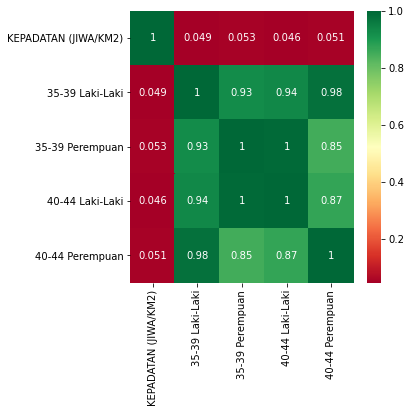

In [ ]:
##BONUS
#correlation antar feature + heatmap
import seaborn as sns
import matplotlib.pyplot as plt

hmat = dki.select_dtypes(exclude='object').corr()
top_corr_features = hmat.index[1:6]     #5 features saja
plt.figure(figsize=(5,5))
sns.heatmap(dki[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
dki.TAHUN.unique()

array([2013], dtype=int64)

In [ ]:
dki['NAMA KABUPATEN/KOTA'].unique()

array(['KAB.ADM.KEP.SERIBU', 'JAKARTA PUSAT', 'JAKARTA UTARA',
       'JAKARTA BARAT', 'JAKARTA SELATAN', 'JAKARTA TIMUR'], dtype=object)

## 7. Grouping & Pivot Table

In [ ]:
np.random.seed(123)

jumlah_ternak = pd.DataFrame({
    "binatang": ["ayam", "bebek", "bebek", "ayam", "ayam", "bebek", "ayam", "ayam"],
    "warna": ["kuning", "kuning", "coklat", "merah", "coklat", "coklat", "merah", "kuning"],
    "jumlah 1": np.random.randint(1,999,8),
    "jumlah 2": np.random.randint(1,999,8)})

In [ ]:
jumlah_ternak

,binatang,warna,jumlah 1,jumlah 2
0,ayam,kuning,511,596
1,bebek,kuning,366,107
2,bebek,coklat,383,124
3,ayam,merah,323,570
4,ayam,coklat,989,215
5,bebek,coklat,99,738
6,ayam,merah,743,97
7,ayam,kuning,18,114


In [ ]:
jumlah_ternak.groupby('binatang').sum() #jumlahnya berdasarkan nama binatang

,jumlah 1,jumlah 2
binatang,,
ayam,2584,1592
bebek,848,969


In [ ]:
jumlah_ternak.groupby(['binatang','warna']).sum() #jumlahnya berdasarkan nama binatang

jumlah 1  jumlah 2
binatang warna                     
ayam     coklat       989       215
         kuning       529       710
         merah       1066       667
bebek    coklat       482       862
         kuning       366       107

In [ ]:
jumlah_ternak.groupby('binatang')['jumlah 1'].sum()   #Jumlah 1 berdasarkan binatang, dalam btk series

binatang
ayam     2584
bebek     848
Name: jumlah 1, dtype: int32

In [ ]:
jumlah_ternak.groupby('binatang')['jumlah 1'].sum().reset_index()   #Jumlah 1 berdasarkan binatang, dalam btk dataframe

,binatang,jumlah 1
0,ayam,2584
1,bebek,848


In [ ]:
#jumlah kombinasi antara binatang dan warna
stay = jumlah_ternak.groupby(['binatang','warna'])['jumlah 1'].count().reset_index() #reset_index biar dataframe
stay.rename(columns={'jumlah 1':'count'}, inplace=True)    #ganti nama
stay.head()

,binatang,warna,count
0,ayam,coklat,1
1,ayam,kuning,2
2,ayam,merah,2
3,bebek,coklat,2
4,bebek,kuning,1


In [ ]:
#atau bisa juga
stay = jumlah_ternak.groupby(['binatang','warna']).agg('count').reset_index()  #reset_index biar dataframe
stay = stay.iloc[:,0:3]   #ingin 3 kolom pertama saja
stay.rename(columns={'jumlah 1':'count'}, inplace=True)    #ganti nama
stay.head()

,binatang,warna,count
0,ayam,coklat,1
1,ayam,kuning,2
2,ayam,merah,2
3,bebek,coklat,2
4,bebek,kuning,1


In [ ]:
stay.sort_values(by='count') #Mengurutkan berdasarkan count

,binatang,warna,count
0,ayam,coklat,1
4,bebek,kuning,1
1,ayam,kuning,2
2,ayam,merah,2
3,bebek,coklat,2


In [ ]:
pd.pivot_table(jumlah_ternak,values='jumlah 1',index=['binatang'],columns=['warna'])

warna,coklat,kuning,merah
binatang,,,
ayam,989.0,264.5,533.0
bebek,241.0,366.0,NaN


## Latihan Soal

In [ ]:
dki = pd.read_csv('https://raw.githubusercontent.com/maxwelth/ntar-dihapus/main/dkikepadatankelurahan2013.csv')
dki.dropna(axis=1,inplace=True)

##### 1. Kabupaten/Kota mana yang memiliki jumlah penduduk terbesar untuk umur 35-39? Tampilkan dalam bentuk dataframe (Urutkan terbesar hingga terkecil)

In [ ]:
dki.groupby('NAMA KABUPATEN/KOTA')['35-39 Laki-Laki'].sum()

NAMA KABUPATEN/KOTA
JAKARTA BARAT         181626
JAKARTA PUSAT          50256
JAKARTA SELATAN       100867
JAKARTA TIMUR         135669
JAKARTA UTARA         135132
KAB.ADM.KEP.SERIBU       980
Name: 35-39 Laki-Laki, dtype: int64

In [ ]:
dki.groupby('NAMA KABUPATEN/KOTA')['35-39 Perempuan'].sum()

NAMA KABUPATEN/KOTA
JAKARTA BARAT         106863
JAKARTA PUSAT          47836
JAKARTA SELATAN        98432
JAKARTA TIMUR         130196
JAKARTA UTARA          80461
KAB.ADM.KEP.SERIBU       933
Name: 35-39 Perempuan, dtype: int64

In [ ]:
lakilaki1 = dki.groupby('NAMA KABUPATEN/KOTA')['35-39 Laki-Laki'].sum()
perempuan1 = dki.groupby('NAMA KABUPATEN/KOTA')['35-39 Perempuan'].sum()

In [ ]:
lakilaki2=lakilaki1.reset_index() #Dengan menggunakan reset_index() dari series jadi data frame
lakilaki2

,NAMA KABUPATEN/KOTA,35-39 Laki-Laki
0,JAKARTA BARAT,181626
1,JAKARTA PUSAT,50256
2,JAKARTA SELATAN,100867
3,JAKARTA TIMUR,135669
4,JAKARTA UTARA,135132
5,KAB.ADM.KEP.SERIBU,980


In [ ]:
perempuan2=perempuan1.reset_index()
perempuan2

,NAMA KABUPATEN/KOTA,35-39 Perempuan
0,JAKARTA BARAT,106863
1,JAKARTA PUSAT,47836
2,JAKARTA SELATAN,98432
3,JAKARTA TIMUR,130196
4,JAKARTA UTARA,80461
5,KAB.ADM.KEP.SERIBU,933


In [ ]:
gabungan1 = (lakilaki1 + perempuan1).reset_index()
gabungan1

,NAMA KABUPATEN/KOTA,0
0,JAKARTA BARAT,288489
1,JAKARTA PUSAT,98092
2,JAKARTA SELATAN,199299
3,JAKARTA TIMUR,265865
4,JAKARTA UTARA,215593
5,KAB.ADM.KEP.SERIBU,1913


In [ ]:
gabungan1.columns = ['Kabupaten/Kota', 'Jumlah Penduduk 35-39']
gabungan1 = gabungan1.sort_values(by=['Jumlah Penduduk 35-39'], ascending=False)
gabungan1

,Kabupaten/Kota,Jumlah Penduduk 35-39
0,JAKARTA BARAT,288489
3,JAKARTA TIMUR,265865
4,JAKARTA UTARA,215593
2,JAKARTA SELATAN,199299
1,JAKARTA PUSAT,98092
5,KAB.ADM.KEP.SERIBU,1913


##### 2. Kabupaten/Kota mana yang memiliki jumlah penduduk terbesar (segala umur)? Tampilkan dalam bentuk dataframe (Urutkan terbesar hingga terkecil)

In [ ]:
namakolom = dki.columns.drop(['TAHUN', 'NAMA PROVINSI', 'NAMA KABUPATEN/KOTA', 'NAMA KECAMATAN',
       'NAMA KELURAHAN', 'LUAS WILAYAH (KM2)', 'KEPADATAN (JIWA/KM2)']) #sisakan hanya kolom dengan jumlah penduduk

In [ ]:
namakolom

Index(['35-39 Laki-Laki', '35-39 Perempuan', '40-44 Laki-Laki',
       '40-44 Perempuan', '45-49 Laki-Laki', '45-49 Perempuan',
       '50-54 Laki-Laki', '50-54 Perempuan', '55-59 Laki-Laki',
       '55-59 Perempuan', '60-64 Laki-Laki', '60-64 Perempuan',
       '65-69 Laki-Laki', '65-69 Perempuan', '70-74 Laki-Laki',
       '70-74 Perempuan', '>75 Laki-Laki', '>75  Perempuan'],
      dtype='object')

In [ ]:
b=0
for i in namakolom:
  a = dki.groupby('NAMA KABUPATEN/KOTA')[i].sum()
  b = a+b

In [ ]:
b

NAMA KABUPATEN/KOTA
JAKARTA BARAT         2316181
JAKARTA PUSAT          500056
JAKARTA SELATAN        878137
JAKARTA TIMUR         1136447
JAKARTA UTARA         1695623
KAB.ADM.KEP.SERIBU       8308
dtype: int64

In [ ]:
gabungan2 = b.reset_index()  #ke dataframe
gabungan2.columns = ['Kabupaten', 'Jumlah Penduduk']  #memberi nama pada kolom
gabungan2 = gabungan2.sort_values(by=['Jumlah Penduduk'], ascending=False) #Mengurutkan dari terbesar ke terkecil
gabungan2

,Kabupaten,Jumlah Penduduk
0,JAKARTA BARAT,2316181
4,JAKARTA UTARA,1695623
3,JAKARTA TIMUR,1136447
2,JAKARTA SELATAN,878137
1,JAKARTA PUSAT,500056
5,KAB.ADM.KEP.SERIBU,8308


In [ ]:
#Pertama-tama akan dipilih 3 kelurahan dg luas wilayah terkecil
dki['NAMA KABUPATEN/KOTA'].value_counts()

JAKARTA SELATAN       65
JAKARTA TIMUR         65
JAKARTA BARAT         56
JAKARTA PUSAT         44
JAKARTA UTARA         31
KAB.ADM.KEP.SERIBU     6
Name: NAMA KABUPATEN/KOTA, dtype: int64

In [ ]:
dki['NAMA KABUPATEN/KOTA'].unique()

array(['KAB.ADM.KEP.SERIBU', 'JAKARTA PUSAT', 'JAKARTA UTARA',
       'JAKARTA BARAT', 'JAKARTA SELATAN', 'JAKARTA TIMUR'], dtype=object)

In [ ]:
dki['NAMA KABUPATEN/KOTA'].value_counts().index

Index(['JAKARTA SELATAN', 'JAKARTA TIMUR', 'JAKARTA BARAT', 'JAKARTA PUSAT',
       'JAKARTA UTARA', 'KAB.ADM.KEP.SERIBU'],
      dtype='object')

In [ ]:
namakota = dki['NAMA KABUPATEN/KOTA'].value_counts().index
df_baru = pd.DataFrame()   #dataframe kosong

for i in namakota:
  aa = dki[dki['NAMA KABUPATEN/KOTA']==i].sort_values(by='LUAS WILAYAH (KM2)',ascending=True)[0:3]  #subsetting 3 terkecil
  df_baru = pd.concat([df_baru,aa])  #gabungkan

In [ ]:
df_baru

,TAHUN,NAMA PROVINSI,NAMA KABUPATEN/KOTA,NAMA KECAMATAN,NAMA KELURAHAN,LUAS WILAYAH (KM2),KEPADATAN (JIWA/KM2),35-39 Laki-Laki,35-39 Perempuan,40-44 Laki-Laki,40-44 Perempuan,45-49 Laki-Laki,45-49 Perempuan,50-54 Laki-Laki,50-54 Perempuan,55-59 Laki-Laki,55-59 Perempuan,60-64 Laki-Laki,60-64 Perempuan,65-69 Laki-Laki,65-69 Perempuan,70-74 Laki-Laki,70-74 Perempuan,>75 Laki-Laki,>75 Perempuan
142,2013,PROVINSI DKI JAKARTA,JAKARTA SELATAN,TEBET,MANGGARAI SELATAN,0.51,52659,1239,1289,1238,1198,1080,1007,790,757,607,634,361,414,212,288,218,229,127,178
150,2013,PROVINSI DKI JAKARTA,JAKARTA SELATAN,SETIA BUDI,GUNTUR,0.65,7174,208,206,186,192,181,205,168,152,140,157,114,115,62,78,55,45,37,84
187,2013,PROVINSI DKI JAKARTA,JAKARTA SELATAN,PANCORAN,RAWA JATI,0.67,29915,990,985,970,902,786,683,517,527,400,439,294,309,174,200,154,126,69,80
215,2013,PROVINSI DKI JAKARTA,JAKARTA TIMUR,JATINEGARA,KAMPUNG MELAYU,0.48,63973,1361,1154,1236,1050,1016,1029,864,848,694,601,436,409,205,294,151,173,121,159
204,2013,PROVINSI DKI JAKARTA,JAKARTA TIMUR,MATRAMAN,KAYU MANIS,0.57,52740,1377,1336,1271,1337,1173,1144,868,899,676,690,450,450,249,276,172,219,111,185
205,2013,PROVINSI DKI JAKARTA,JAKARTA TIMUR,MATRAMAN,PAL MERIAM,0.65,36818,1101,1061,1061,1001,934,879,790,722,577,563,351,398,181,240,151,169,131,204
102,2013,PROVINSI DKI JAKARTA,JAKARTA BARAT,TAMBORA,TAMBORA,0.28,45375,968,588,544,1132,646,593,1239,598,522,1120,544,451,995,460,425,885,385,368
99,2013,PROVINSI DKI JAKARTA,JAKARTA BARAT,TAMAN SARI,KEAGUNGAN,0.32,65800,1673,975,932,1907,1117,1017,2134,1030,910,1940,941,778,1719,817,725,1542,662,578
103,2013,PROVINSI DKI JAKARTA,JAKARTA BARAT,TAMBORA,KALI ANYAR,0.32,94166,2532,1567,1530,3097,1775,1554,3329,1549,1275,2824,1251,1022,2273,1035,841,1876,808,746
48,2013,PROVINSI DKI JAKARTA,JAKARTA PUSAT,JOHAR BARU,GALUR,0.27,79022,999,1060,925,982,820,795,727,621,535,436,421,259,257,139,169,124,130,64


In [ ]:
#Selanjutnya akan dibuat 3 kelompok umur
df_baru.columns

Index(['TAHUN', 'NAMA PROVINSI', 'NAMA KABUPATEN/KOTA', 'NAMA KECAMATAN',
       'NAMA KELURAHAN', 'LUAS WILAYAH (KM2)', 'KEPADATAN (JIWA/KM2)',
       '35-39 Laki-Laki', '35-39 Perempuan', '40-44 Laki-Laki',
       '40-44 Perempuan', '45-49 Laki-Laki', '45-49 Perempuan',
       '50-54 Laki-Laki', '50-54 Perempuan', '55-59 Laki-Laki',
       '55-59 Perempuan', '60-64 Laki-Laki', '60-64 Perempuan',
       '65-69 Laki-Laki', '65-69 Perempuan', '70-74 Laki-Laki',
       '70-74 Perempuan', '>75 Laki-Laki', '>75  Perempuan'],
      dtype='object')

In [ ]:
df_baru.columns[7:13]

Index(['35-39 Laki-Laki', '35-39 Perempuan', '40-44 Laki-Laki',
       '40-44 Perempuan', '45-49 Laki-Laki', '45-49 Perempuan'],
      dtype='object')

In [ ]:
df_baru[df_baru.columns[7:13]].head()

,35-39 Laki-Laki,35-39 Perempuan,40-44 Laki-Laki,40-44 Perempuan,45-49 Laki-Laki,45-49 Perempuan
215,1361,1154,1236,1050,1016,1029
204,1377,1336,1271,1337,1173,1144
205,1101,1061,1061,1001,934,879
142,1239,1289,1238,1198,1080,1007
150,208,206,186,192,181,205


In [ ]:
def kel1(x):
  w = df_baru.columns[7:13]
  wow = x[w[0]]+x[w[1]]+x[w[2]]+x[w[3]]+x[w[4]]+x[w[5]]   #kolom 1 ditambah kolom 2 dsb
  return wow

def kel2(x):
  w = df_baru.columns[13:19]
  wow = x[w[0]]+x[w[1]]+x[w[2]]+x[w[3]]+x[w[4]]+x[w[5]]
  return wow

def kel3(x):
  w = df_baru.columns[19:25]
  wow = x[w[0]]+x[w[1]]+x[w[2]]+x[w[3]]+x[w[4]]+x[w[5]]
  return wow

In [ ]:
df_baru['kelompok 1'] = df_baru.apply(lambda x: kel1(x), axis=1)
df_baru['kelompok 2'] = df_baru.apply(lambda x: kel2(x), axis=1)
df_baru['kelompok 3'] = df_baru.apply(lambda x: kel3(x), axis=1)

In [ ]:
df_baru.head()

,TAHUN,NAMA PROVINSI,NAMA KABUPATEN/KOTA,NAMA KECAMATAN,NAMA KELURAHAN,LUAS WILAYAH (KM2),KEPADATAN (JIWA/KM2),35-39 Laki-Laki,35-39 Perempuan,40-44 Laki-Laki,40-44 Perempuan,45-49 Laki-Laki,45-49 Perempuan,50-54 Laki-Laki,50-54 Perempuan,55-59 Laki-Laki,55-59 Perempuan,60-64 Laki-Laki,60-64 Perempuan,65-69 Laki-Laki,65-69 Perempuan,70-74 Laki-Laki,70-74 Perempuan,>75 Laki-Laki,>75 Perempuan,kelompok 1,kelompok 2,kelompok 3
215,2013,PROVINSI DKI JAKARTA,JAKARTA TIMUR,JATINEGARA,KAMPUNG MELAYU,0.48,63973,1361,1154,1236,1050,1016,1029,864,848,694,601,436,409,205,294,151,173,121,159,6846,3852,1103
204,2013,PROVINSI DKI JAKARTA,JAKARTA TIMUR,MATRAMAN,KAYU MANIS,0.57,52740,1377,1336,1271,1337,1173,1144,868,899,676,690,450,450,249,276,172,219,111,185,7638,4033,1212
205,2013,PROVINSI DKI JAKARTA,JAKARTA TIMUR,MATRAMAN,PAL MERIAM,0.65,36818,1101,1061,1061,1001,934,879,790,722,577,563,351,398,181,240,151,169,131,204,6037,3401,1076
142,2013,PROVINSI DKI JAKARTA,JAKARTA SELATAN,TEBET,MANGGARAI SELATAN,0.51,52659,1239,1289,1238,1198,1080,1007,790,757,607,634,361,414,212,288,218,229,127,178,7051,3563,1252
150,2013,PROVINSI DKI JAKARTA,JAKARTA SELATAN,SETIA BUDI,GUNTUR,0.65,7174,208,206,186,192,181,205,168,152,140,157,114,115,62,78,55,45,37,84,1178,846,361


In [ ]:
#sederhanakan dataframe dg column yang kita mau saja
df_baru = df_baru[['NAMA KABUPATEN/KOTA','NAMA KECAMATAN','NAMA KELURAHAN','kelompok 1','kelompok 2','kelompok 3']]
df_baru.head()

,NAMA KABUPATEN/KOTA,NAMA KECAMATAN,NAMA KELURAHAN,kelompok 1,kelompok 2,kelompok 3
215,JAKARTA TIMUR,JATINEGARA,KAMPUNG MELAYU,6846,3852,1103
204,JAKARTA TIMUR,MATRAMAN,KAYU MANIS,7638,4033,1212
205,JAKARTA TIMUR,MATRAMAN,PAL MERIAM,6037,3401,1076
142,JAKARTA SELATAN,TEBET,MANGGARAI SELATAN,7051,3563,1252
150,JAKARTA SELATAN,SETIA BUDI,GUNTUR,1178,846,361


In [ ]:
#buat kolom untuk persentase lansia
df_baru['persentase lansia'] = df_baru['kelompok 3'] / (df_baru['kelompok 1']+df_baru['kelompok 2']+df_baru['kelompok 3'])
df_baru.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,NAMA KABUPATEN/KOTA,NAMA KECAMATAN,NAMA KELURAHAN,kelompok 1,kelompok 2,kelompok 3,persentase lansia
215,JAKARTA TIMUR,JATINEGARA,KAMPUNG MELAYU,6846,3852,1103,0.093467
204,JAKARTA TIMUR,MATRAMAN,KAYU MANIS,7638,4033,1212,0.094077
205,JAKARTA TIMUR,MATRAMAN,PAL MERIAM,6037,3401,1076,0.102340
142,JAKARTA SELATAN,TEBET,MANGGARAI SELATAN,7051,3563,1252,0.105512
150,JAKARTA SELATAN,SETIA BUDI,GUNTUR,1178,846,361,0.151363


In [ ]:
#urutkan dari terbesar
df_baru.sort_values(by='persentase lansia', ascending= False, inplace = True)
df_baru.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,NAMA KABUPATEN/KOTA,NAMA KECAMATAN,NAMA KELURAHAN,kelompok 1,kelompok 2,kelompok 3,persentase lansia
99,JAKARTA BARAT,TAMAN SARI,KEAGUNGAN,7621,7733,6043,0.282423
102,JAKARTA BARAT,TAMBORA,TAMBORA,4471,4474,3518,0.282276
61,JAKARTA UTARA,TANJUNG PRIOK,WARAKAS,19882,21134,14368,0.259425
65,JAKARTA UTARA,KOJA,RAWA BADAK UTARA,15649,15985,10779,0.254144
103,JAKARTA BARAT,TAMBORA,KALI ANYAR,12055,11250,7579,0.245402


In [ ]:
### 'Keagungan', 'Tambora', 'Warakas', 'Rawa Badak Utara', 'Kali Anyar' menjadi 5 kelurahan pertama yang diprioritaskan untuk vaksinasi